In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import beta
from scipy import stats
np.random.seed(seed=42)
import math 

from collections import Counter
from scipy.stats import chi2_contingency

In [2]:
import random
from random import randint

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Identity Table

In [4]:
train = pd.read_csv('~/downloads/train_identity.csv', delimiter = ',', header = 0)

In [5]:
train

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,NaN,427.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,15.0,352.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.1.1,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,27.0,567.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,15.0,352.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_9_5,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [6]:
train.drop(['id_01', 'id_02', 'id_03', 'id_04', 'id_05','id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'], axis=1, inplace = True)

In [7]:
train

,TransactionID,id_23,id_30,id_31,DeviceType,DeviceInfo
0,2987004,NaN,Android 7.0,samsung browser 6.2,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,NaN,iOS 11.1.2,mobile safari 11.0,mobile,iOS Device
2,2987010,NaN,NaN,chrome 62.0,desktop,Windows
3,2987011,NaN,NaN,chrome 62.0,desktop,NaN
4,2987016,NaN,Mac OS X 10_11_6,chrome 62.0,desktop,MacOS
...,...,...,...,...,...,...
144228,3577521,NaN,NaN,chrome 66.0 for android,mobile,F3111 Build/33.3.A.1.97
144229,3577526,NaN,Android 7.1.1,chrome 55.0 for android,mobile,A574BL Build/NMF26F
144230,3577529,NaN,NaN,chrome 65.0 for android,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,NaN,Mac OS X 10_9_5,chrome 66.0,desktop,MacOS


In [8]:
#Add column to dataframe

In [9]:
def extract3(train):
    from numpy import NaN
    if train['id_30'] is NaN: return "other"
    val = train['id_30'].lower()
    
    if val.find('windows') > -1:
        return 'Windows'
    elif val.find('mac') > -1:
        return 'Mac'
    elif val.find('ios')> -1:
        return 'iOS'
    elif val.find('linux')> -1:
        return 'Linux'
    elif val.find('android')> -1:
        return 'Android'
    else:
        return 'other'

In [10]:
# train2 = train['id_30'].notna()
# train[train2].apply(extract3, axis=1)

In [11]:
train.loc[:,'OperatingSystem'] = train.apply(extract3, axis=1)

In [12]:
train.head()

,TransactionID,id_23,id_30,id_31,DeviceType,DeviceInfo,OperatingSystem
0,2987004,NaN,Android 7.0,samsung browser 6.2,mobile,SAMSUNG SM-G892A Build/NRD90M,Android
1,2987008,NaN,iOS 11.1.2,mobile safari 11.0,mobile,iOS Device,iOS
2,2987010,NaN,NaN,chrome 62.0,desktop,Windows,other
3,2987011,NaN,NaN,chrome 62.0,desktop,NaN,other
4,2987016,NaN,Mac OS X 10_11_6,chrome 62.0,desktop,MacOS,Mac


In [13]:
# def extract3(train3):
#     from numpy import NaN
#     if train['id_31'] is NaN: return "other"
#     val = train['id_31'].lower()
    
#     if val.find('samsung') > -1:
#         return 'Samsung Browser'
#     elif val.find('mobile') > -1:
#         return 'Safari'
#     elif val.find('edge')> -1:
#         return 'Microsoft Edge'
#     elif val.find('safari')> -1:
#         return 'Safari'
#     elif val.find('firefox')> -1:
#         return 'Firefox'
#     elif val.find('ie')> -1:
#         return 'Internet Explorer'
#     else:
#         return 'other'

In [14]:
# train3 = train['id_31'].notna()
# train[train3].apply(extract3, axis=1)

In [15]:
# # train.loc[:,'Browsers'] = 
# train.apply(extract3, axis=1)

In [16]:
train

,TransactionID,id_23,id_30,id_31,DeviceType,DeviceInfo,OperatingSystem
0,2987004,NaN,Android 7.0,samsung browser 6.2,mobile,SAMSUNG SM-G892A Build/NRD90M,Android
1,2987008,NaN,iOS 11.1.2,mobile safari 11.0,mobile,iOS Device,iOS
2,2987010,NaN,NaN,chrome 62.0,desktop,Windows,other
3,2987011,NaN,NaN,chrome 62.0,desktop,NaN,other
4,2987016,NaN,Mac OS X 10_11_6,chrome 62.0,desktop,MacOS,Mac
...,...,...,...,...,...,...,...
144228,3577521,NaN,NaN,chrome 66.0 for android,mobile,F3111 Build/33.3.A.1.97,other
144229,3577526,NaN,Android 7.1.1,chrome 55.0 for android,mobile,A574BL Build/NMF26F,Android
144230,3577529,NaN,NaN,chrome 65.0 for android,mobile,Moto E (4) Plus Build/NMA26.42-152,other
144231,3577531,NaN,Mac OS X 10_9_5,chrome 66.0,desktop,MacOS,Mac


In [17]:
for col, values in train.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 144233
[2987004 2987008 2987010 ... 3577529 3577531 3577534]


id_23: 3
[nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']


id_30: 75
['Android 7.0' 'iOS 11.1.2' nan 'Mac OS X 10_11_6' 'Windows 10' 'Android'
 'Linux' 'iOS 11.0.3' 'Mac OS X 10_7_5' 'Mac OS X 10_12_6'
 'Mac OS X 10_13_1' 'iOS 11.1.0' 'Mac OS X 10_9_5' 'Windows 7'
 'Windows 8.1' 'Mac' 'iOS 10.3.3' 'Mac OS X 10.12' 'Mac OS X 10_10_5'
 'Mac OS X 10_11_5' 'iOS 9.3.5' 'Android 5.1.1' 'Android 7.1.1'
 'Android 6.0' 'iOS 10.3.1' 'Mac OS X 10.9' 'iOS 11.1.1' 'Windows Vista'
 'iOS 10.3.2' 'iOS 11.0.2' 'Mac OS X 10.11' 'Android 8.0.0' 'iOS 10.2.0'
 'iOS 10.2.1' 'iOS 11.0.0' 'Mac OS X 10.10' 'Mac OS X 10_12_3'
 'Mac OS X 10_12' 'Android 6.0.1' 'iOS' 'Mac OS X 10.13'
 'Mac OS X 10_12_5' 'Mac OS X 10_8_5' 'iOS 11.0.1' 'iOS 10.0.2'
 'Android 5.0.2' 'Windows XP' 'iOS 11.2.0' 'Mac OS X 10.6' 'Windows 8'
 'Mac OS X 10_6_8' 'Mac OS X 10_11_4' 'Mac OS X 10_12_1' 'iOS 10.1.1'
 'Mac OS X 10_11_3' 'Mac OS X 10

# Transaction Table

In [18]:
trans = pd.read_csv('~/downloads/train_transaction.csv', delimiter = ',', header = 0)

In [19]:
trans

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0

In [20]:
# trans.card1.unique()

for col, values in trans.iteritems():
     num_uniques = values.nunique()
     print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
     print (values.unique())
     print ('\n')

TransactionID: 590540
[2987000 2987001 2987002 ... 3577537 3577538 3577539]


isFraud: 2
[0 1]


TransactionDT: 573349
[   86400    86401    86469 ... 15811079 15811088 15811131]


TransactionAmt: 20902
[  68.5    29.     59.   ...  557.54 1659.95  400.78]


ProductCD: 5
['W' 'H' 'C' 'S' 'R']


card1: 13553
[13926  2755  4663 ... 13166  8767 18038]


card2: 500
[ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 561. 387. 411. 392. 203. 297. 136. 27

In [21]:
trans['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [22]:
# trans.groupby(['addr2', 'addr1']).size()

In [23]:
# trans.loc[trans['isFraud'] == 1]

In [24]:
# # trans.loc[trans['addr2'] == 87.0]
# trans.loc[trans['addr2'] != 87.0]

# Merged Table

In [25]:
#Merged both tables together, extracting the rows I need from Trans table that 
merged = pd.merge(train, trans[['TransactionID', 'ProductCD', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain' ]],
on = 'TransactionID')
merged

,TransactionID,id_23,id_30,id_31,DeviceType,DeviceInfo,OperatingSystem,ProductCD,isFraud,TransactionDT,TransactionAmt,card4,card6,P_emaildomain,R_emaildomain
0,2987004,NaN,Android 7.0,samsung browser 6.2,mobile,SAMSUNG SM-G892A Build/NRD90M,Android,H,0,86506,50.000,mastercard,credit,gmail.com,NaN
1,2987008,NaN,iOS 11.1.2,mobile safari 11.0,mobile,iOS Device,iOS,H,0,86535,15.000,visa,debit,anonymous.com,NaN
2,2987010,NaN,NaN,chrome 62.0,desktop,Windows,other,C,0,86549,75.887,mastercard,credit,gmail.com,gmail.com
3,2987011,NaN,NaN,chrome 62.0,desktop,NaN,other,C,0,86555,16.495,mastercard,debit,hotmail.com,hotmail.com
4,2987016,NaN,Mac OS X 10_11_6,chrome 62.0,desktop,MacOS,Mac,H,0,86620,30.000,visa,debit,aol.com,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,NaN,NaN,chrome 66.0 for android,mobile,F3111 Build/33.3.A.1.97,other,C,0,15810802,48.877,mastercard,debit,yahoo.fr,yahoo.fr
144229,3577526,NaN,Android 7.1.1,chrome 55.0 for android,mobile,A574BL Build/NMF26F,Android,R,1,15810876,250.000,visa,credit,gmail.com,gmail.com
144230,3577529,NaN,NaN,chrome 65.0 for android,mobile,Moto E (4) Plus Build/NMA26.42-152,other,C,0,15810912,73.838,mastercard,credit,gmail.com,gmail.com
144231,3577531,NaN,Mac OS X 10_9_5,chrome 66.0,desktop,MacOS,Mac,R,0,15810935,400.000,visa,credit,gmail.com,anonymous.com


In [26]:
#Number of null values
merged.isna().sum() 

TransactionID           0
id_23              139064
id_30               66668
id_31                3951
DeviceType           3423
DeviceInfo          25567
OperatingSystem         0
ProductCD               0
isFraud                 0
TransactionDT           0
TransactionAmt          0
card4                 184
card6                 178
P_emaildomain       13391
R_emaildomain       13150
dtype: int64

In [27]:
#Number of unique values
merged.nunique()

TransactionID      144233
id_23                   3
id_30                  75
id_31                 130
DeviceType              2
DeviceInfo           1786
OperatingSystem         6
ProductCD               4
isFraud                 2
TransactionDT      142734
TransactionAmt       7830
card4                   4
card6                   3
P_emaildomain          59
R_emaildomain          60
dtype: int64

In [28]:
merged.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt
count,1.442330e+05,144233.000000,1.442330e+05,144233.000000
mean,3.236329e+06,0.078470,6.166958e+06,83.554533
std,1.788496e+05,0.268911,4.807714e+06,99.850258
min,2.987004e+06,0.000000,8.650600e+04,0.251000
25%,3.077142e+06,0.000000,1.885289e+06,25.453000
50%,3.198818e+06,0.000000,4.913738e+06,50.000000
75%,3.392923e+06,0.000000,1.025794e+07,100.000000
max,3.577534e+06,1.000000,1.581103e+07,1800.000000


In [29]:
#Number of non-null vales 
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    144233 non-null  int64  
 1   id_23            5169 non-null    object 
 2   id_30            77565 non-null   object 
 3   id_31            140282 non-null  object 
 4   DeviceType       140810 non-null  object 
 5   DeviceInfo       118666 non-null  object 
 6   OperatingSystem  144233 non-null  object 
 7   ProductCD        144233 non-null  object 
 8   isFraud          144233 non-null  int64  
 9   TransactionDT    144233 non-null  int64  
 10  TransactionAmt   144233 non-null  float64
 11  card4            144049 non-null  object 
 12  card6            144055 non-null  object 
 13  P_emaildomain    130842 non-null  object 
 14  R_emaildomain    131083 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 17.6+ MB


In [30]:
for col, values in merged.iteritems():
     num_uniques = values.nunique()
     print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
     print (values.unique())
     print ('\n')

TransactionID: 144233
[2987004 2987008 2987010 ... 3577529 3577531 3577534]


id_23: 3
[nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']


id_30: 75
['Android 7.0' 'iOS 11.1.2' nan 'Mac OS X 10_11_6' 'Windows 10' 'Android'
 'Linux' 'iOS 11.0.3' 'Mac OS X 10_7_5' 'Mac OS X 10_12_6'
 'Mac OS X 10_13_1' 'iOS 11.1.0' 'Mac OS X 10_9_5' 'Windows 7'
 'Windows 8.1' 'Mac' 'iOS 10.3.3' 'Mac OS X 10.12' 'Mac OS X 10_10_5'
 'Mac OS X 10_11_5' 'iOS 9.3.5' 'Android 5.1.1' 'Android 7.1.1'
 'Android 6.0' 'iOS 10.3.1' 'Mac OS X 10.9' 'iOS 11.1.1' 'Windows Vista'
 'iOS 10.3.2' 'iOS 11.0.2' 'Mac OS X 10.11' 'Android 8.0.0' 'iOS 10.2.0'
 'iOS 10.2.1' 'iOS 11.0.0' 'Mac OS X 10.10' 'Mac OS X 10_12_3'
 'Mac OS X 10_12' 'Android 6.0.1' 'iOS' 'Mac OS X 10.13'
 'Mac OS X 10_12_5' 'Mac OS X 10_8_5' 'iOS 11.0.1' 'iOS 10.0.2'
 'Android 5.0.2' 'Windows XP' 'iOS 11.2.0' 'Mac OS X 10.6' 'Windows 8'
 'Mac OS X 10_6_8' 'Mac OS X 10_11_4' 'Mac OS X 10_12_1' 'iOS 10.1.1'
 'Mac OS X 10_11_3' 'Mac OS X 10

# Visualizations

In [31]:
#GRAPHS TO GO ON THE SLIDESHOW of merged columns

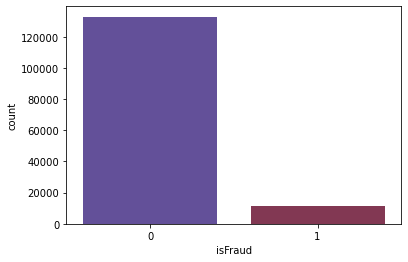

In [32]:
sns.countplot(x="isFraud", data=merged, palette='twilight');

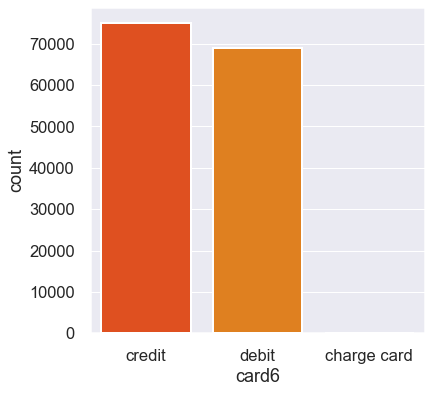

In [33]:
sns.set(rc={'figure.figsize': (6, 6)})
sns.set_context("poster", font_scale = .75, rc={"grid.linewidth": 1.0})
sns.countplot(x="card6", data=merged, palette='autumn');

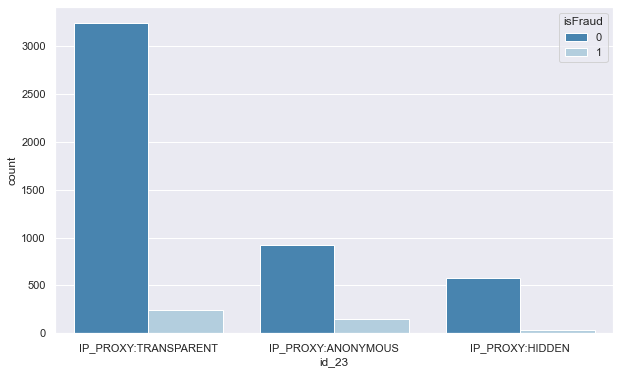

In [34]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.countplot(x="id_23", data=merged, hue="isFraud", palette='Blues_r');

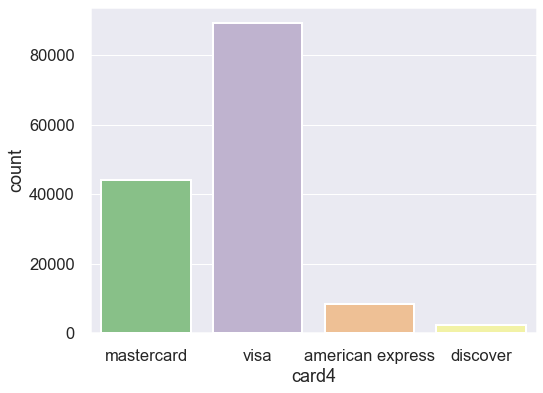

In [35]:
sns.set(rc={'figure.figsize': (8, 6)})
sns.set_context("poster", font_scale = .75, rc={"grid.linewidth": 1.0})
sns.countplot(x="card4", data=merged, palette='Accent');

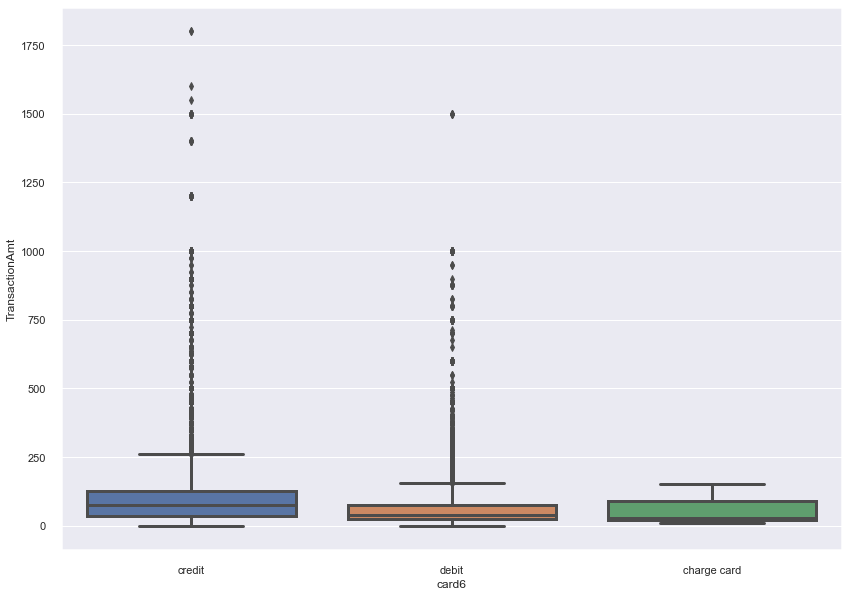

In [36]:
sns.set(rc={'figure.figsize': (14, 10)})
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 1.0})
ax = sns.boxplot(x = 'card6', y = 'TransactionAmt', data = merged)

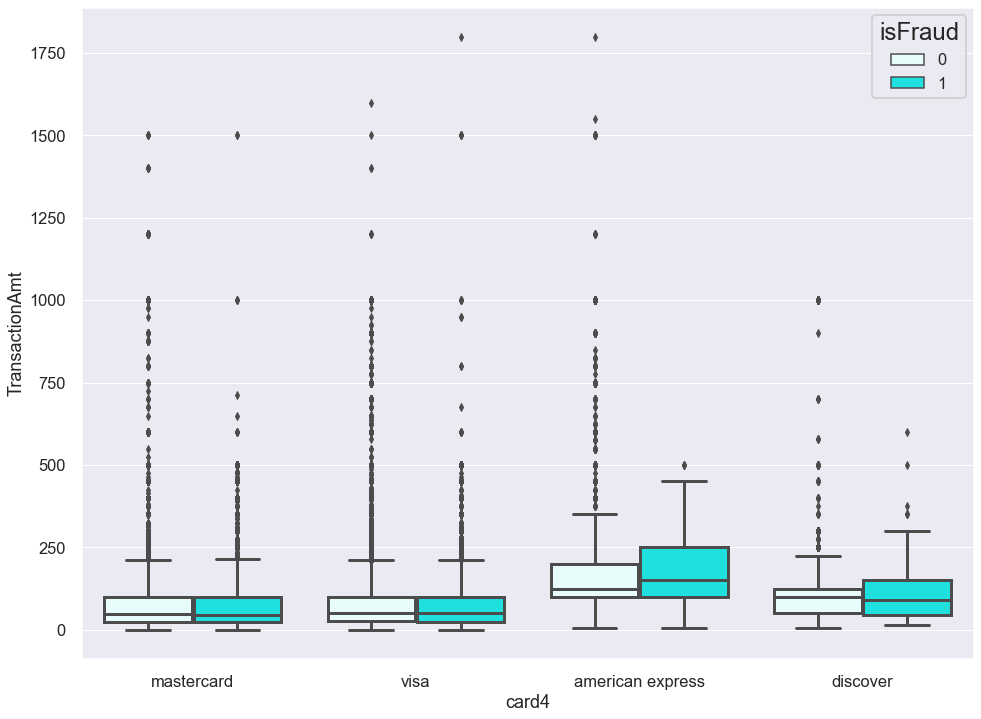

In [37]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.set_context("poster", font_scale = .75, rc={"grid.linewidth": 1.0})
ax = sns.boxplot(x = 'card4', y = 'TransactionAmt', data = merged, color = 'cyan', hue = 'isFraud')

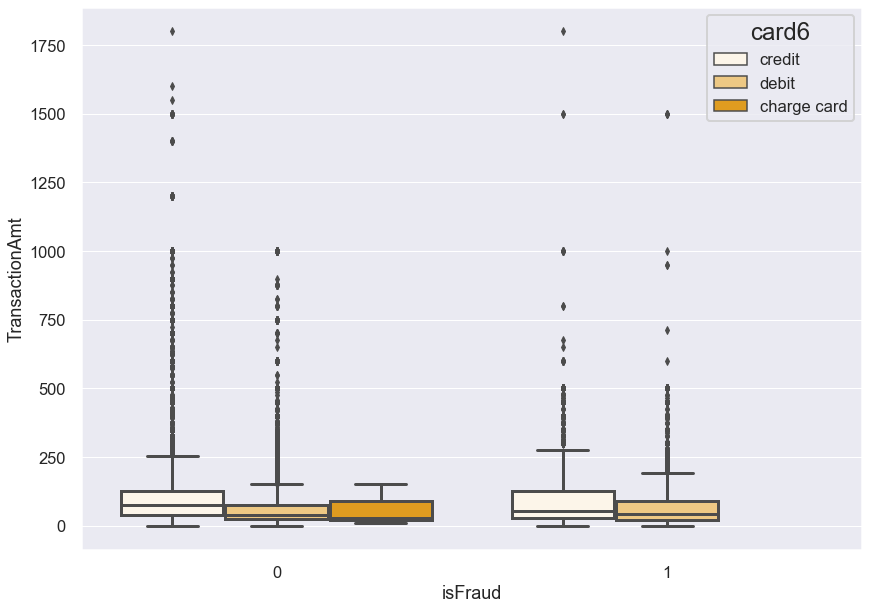

In [38]:
sns.set(rc={'figure.figsize': (14, 10)})
sns.set_context("poster", font_scale = .75, rc={"grid.linewidth": 1.0})
ax = sns.boxplot(x = 'isFraud', y = 'TransactionAmt', data = merged, color = 'orange', hue = 'card6')

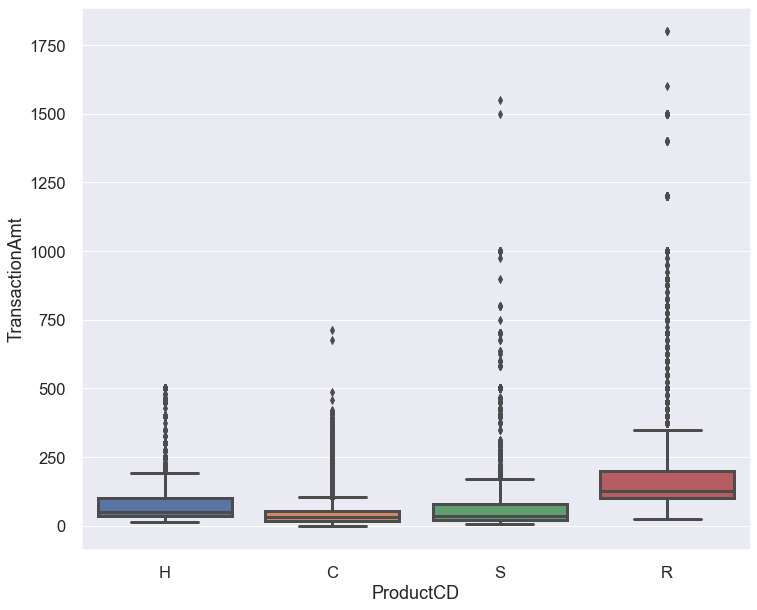

In [39]:
sns.set(rc={'figure.figsize': (12, 10)})
sns.set_context("poster", font_scale = .75, rc={"grid.linewidth": 1.0})
ax = sns.boxplot(x = 'ProductCD', y = 'TransactionAmt', data = merged)

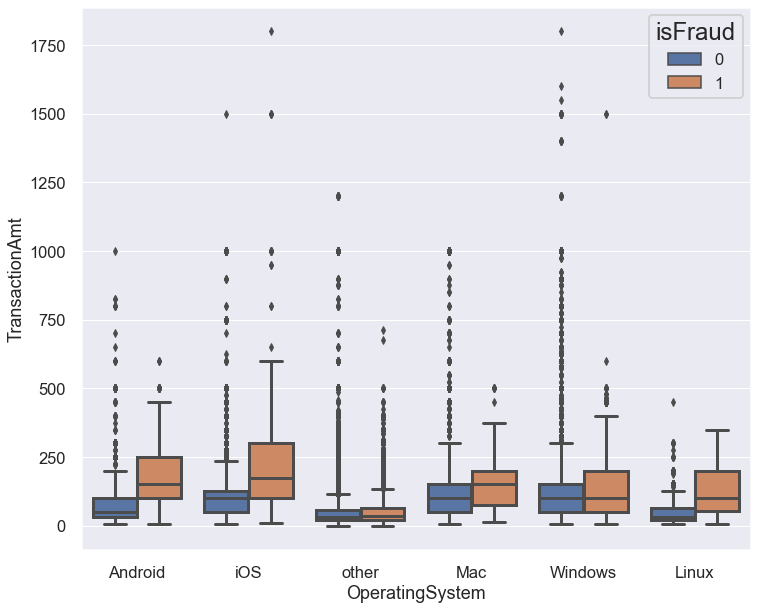

In [52]:
sns.set(rc={'figure.figsize': (12, 10)})
sns.set_context("poster", font_scale = .75, rc={"grid.linewidth": 1.0})
ax = sns.boxplot(x = 'OperatingSystem', y = 'TransactionAmt', hue = 'isFraud', data = merged)

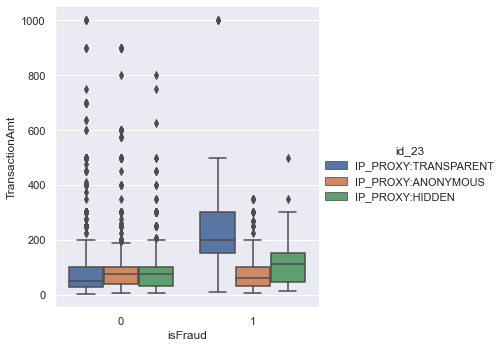

In [53]:
sns.set(rc={'figure.figsize': (14, 8)})
ax = sns.catplot(x="isFraud", y="TransactionAmt", hue="id_23", kind="box", data=merged)

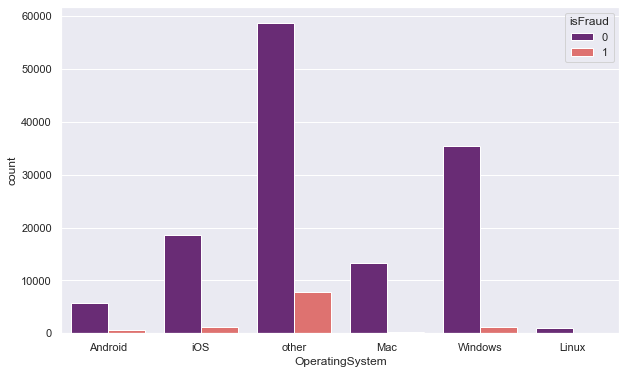

In [41]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.countplot(x="OperatingSystem", data=merged, hue="isFraud", palette='magma');

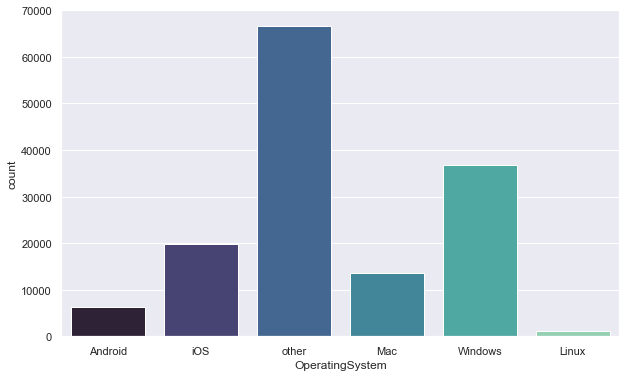

In [42]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.countplot(x="OperatingSystem", data=merged, palette='mako');

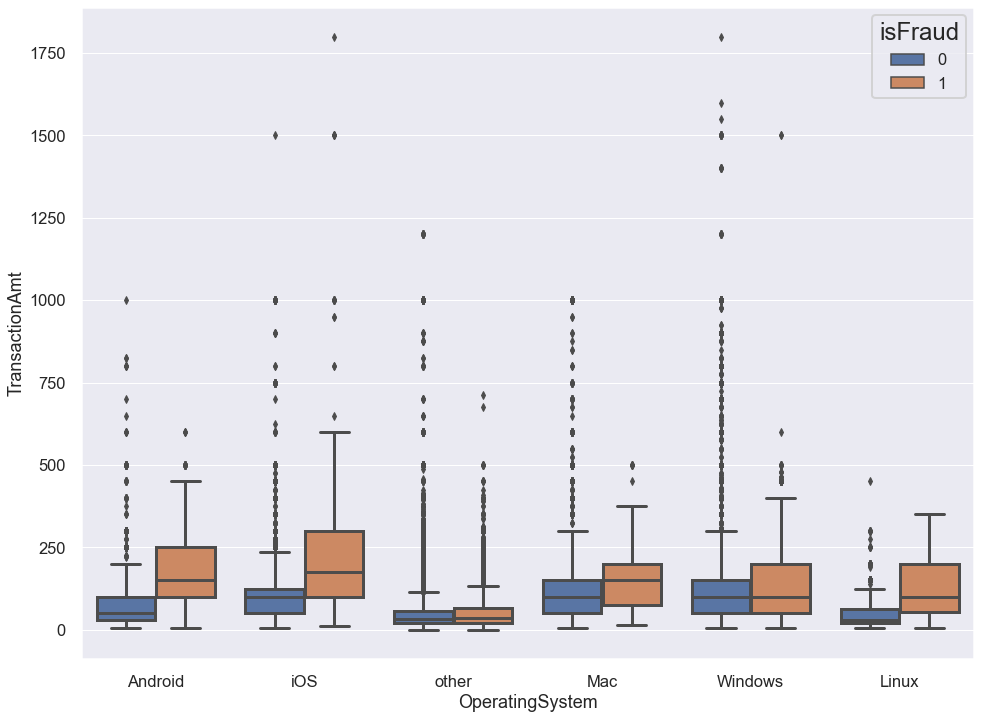

In [57]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.set_context("poster", font_scale = .75, rc={"grid.linewidth": 1.0})
ax = sns.boxplot(x = 'OperatingSystem', y = 'TransactionAmt', data = merged, hue = 'isFraud')

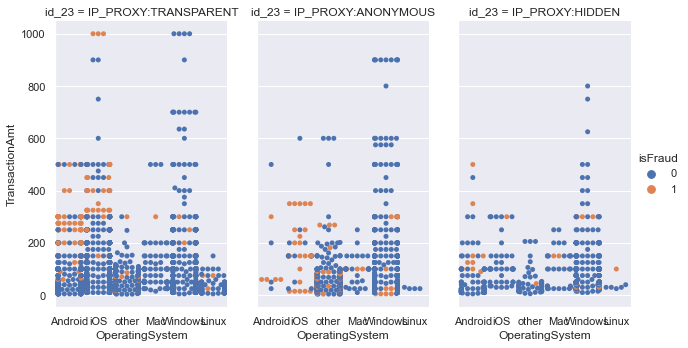

In [58]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.catplot(x="OperatingSystem", y="TransactionAmt", hue="isFraud",
            col="id_23", aspect=.6,
            kind="swarm", data=merged);

In [46]:
# sns.catplot(x="isFraud", y="TransactionAmt", hue="id_23",
#             kind="violin", split=True, data=merged);

In [ ]:
sns.catplot(x="isFraud", y="TransactionAmt", hue="id_23", kind="point", data=merged);

# Null Hypothesis and Testing for Statiscal Significance

In [ ]:
#Null Hypothesis - There is no relationship between IP Address Types and Fraudulent Transactions
#Null Hypothesis - There is no relationship between Payment Methods and Fraudulent Transactions
#Null Hypothesis - There is no relationship between Card Issuers and Fraudulent Transactions

In [ ]:
merged.groupby(['isFraud', 'card4']).size()

In [ ]:
merged.groupby(['isFraud', 'card6']).size()

In [ ]:
merged.groupby(['isFraud', 'id_23']).size()

In [ ]:
merged.groupby(['isFraud', 'OperatingSystem']).size()

In [ ]:
merged.card4.value_counts()

In [ ]:
merged.card6.value_counts()

In [ ]:
merged.id_23.value_counts()

In [ ]:
merged.OperatingSystem.value_counts()

In [ ]:
pd.crosstab(merged['isFraud'], merged['card4'])

In [ ]:
pd.crosstab(merged['isFraud'], merged['card6'])

In [ ]:
pd.crosstab(merged['isFraud'], merged['id_23'])

In [ ]:
pd.crosstab(merged['isFraud'], merged['OperatingSystem'])

In [ ]:
observed = pd.crosstab(merged['isFraud'], merged['card4'])

# Payment Method Statistical Testing

In [ ]:
chi2_contingency(observed)

In [ ]:
chi2, p, dof, expected = chi2_contingency(observed.values)

print(f'The test statistic is {chi2}. \nThe p value is {p}.')

In [ ]:
if p < 0.05:    # alpha value is 0.05 or 5% 
   print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

# Card Issuer Statistical Testing

In [ ]:
observed2 = pd.crosstab(merged['isFraud'], merged['card6'])

In [ ]:
chi2_contingency(observed2)

In [ ]:
chi2, p, dof, expected = chi2_contingency(observed2.values)

if p < 0.05:    # alpha value is 0.05 or 5% 
   print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

print(f'The test statistic is {chi2}. \nThe p value is {p}.')

# IT Proxy Statistical Testing

In [ ]:
observed3 = pd.crosstab(merged['isFraud'], merged['id_23'])

In [ ]:
chi2_contingency(observed3)

In [ ]:
chi2, p, dof, expected = chi2_contingency(observed3.values)

if p < 0.05:    # alpha value is 0.05 or 5% 
   print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

print(f'The test statistic is {chi2}. \nThe p value is {p}.')

# Operating System Statistical Testing

In [ ]:
observed4 = pd.crosstab(merged['isFraud'], merged['OperatingSystem'])

In [ ]:
chi2_contingency(observed4)

In [ ]:
chi2, p, dof, expected = chi2_contingency(observed4.values)

if p < 0.05:    # alpha value is 0.05 or 5% 
   print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

print(f'The test statistic is {chi2}. \nThe p value is {p}.')